# Analyses of multiple large populations

In [2]:
import pickle
import gzip
import numpy as np
import pandas as pd
from scipy import stats

import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ThesisScripts.MyModel import *
from ThesisScripts.Analyses import *

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

#matplotlib preamble, taken from http://blog.juliusschulz.de/blog/ultimate-ipython-notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

## Load data

In [2]:
%%time

# NEUTRAL POPULAITONS
prefix = '../../Simulations/Ensemble-simulations/saved_simulations/large-neutral-1000_MultiSim/'
neutral = []

for i in range(1000):
    file_path = prefix + 'population_' + '%s' %(i) + '.pkl.gz'
    data = pd.read_pickle(file_path, compression='gzip')
    neutral.append(data)
print(len(neutral))
print(type(neutral[0]))

1000
<class 'pandas.core.frame.DataFrame'>
CPU times: user 1min 47s, sys: 51.2 s, total: 2min 38s
Wall time: 2min 49s


## Maximum allele frequencies

In [3]:
%%time
neutral_MaxAFs = get_max_AFs(neutral, det_lim=100)

CPU times: user 3.13 s, sys: 6.47 s, total: 9.6 s
Wall time: 20.5 s


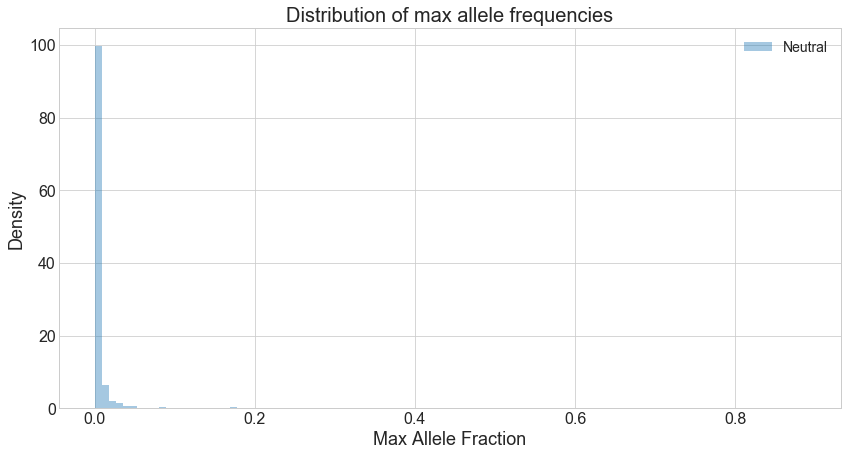

In [4]:
sns.distplot(neutral_MaxAFs, bins=100, norm_hist=True, kde=False, label="Neutral");
plt.title('Distribution of max allele frequencies');
plt.xlabel('Max Allele Fraction');
plt.ylabel('Density');
plt.legend();
plt.savefig('./Figures/MultiSim-Large-1000_sim/Large-neutral-MaxAFs.png')
plt.show()

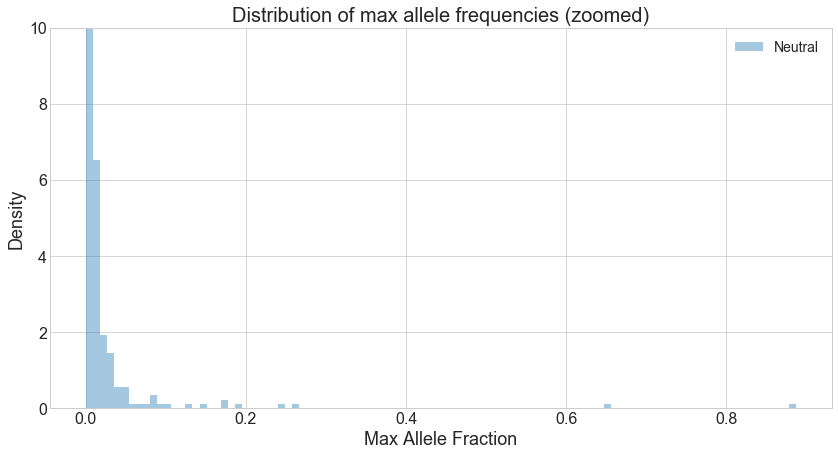

In [5]:
sns.distplot(neutral_MaxAFs, bins=100, norm_hist=True, kde=False, label="Neutral");
plt.title('Distribution of max allele frequencies (zoomed)');
plt.xlabel('Max Allele Fraction');
plt.ylabel('Density');
plt.ylim(0, 10);
plt.legend();
plt.savefig('./Figures/MultiSim-Large-1000_sim/Large-neutral-MaxAFs_zoomed.png')
plt.show()

## Heterogeneity

In [6]:
%%time
neutral_H = get_heterogeneity(neutral, det_lim=100)

CPU times: user 2.94 s, sys: 4.51 s, total: 7.45 s
Wall time: 11 s


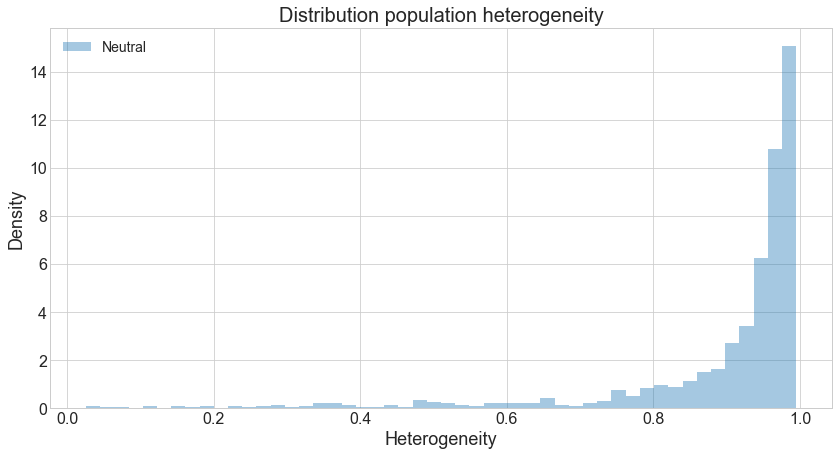

In [7]:
sns.distplot(neutral_H, bins=100, norm_hist=True, kde=False, label="Neutral");
plt.title('Distribution population heterogeneity');
plt.xlabel('Heterogeneity');
plt.ylabel('Density');
plt.legend();
plt.savefig('./Figures/MultiSim-Large-1000_sim/Large-neutral-Heterogeneity.png')
plt.show()

## Mutational burden (number of mutations distrbution)

In [8]:
%%time
neutral_mut_distr = get_mutation_distributions(neutral, det_lim=100)

CPU times: user 1min 3s, sys: 2.57 s, total: 1min 5s
Wall time: 1min 7s


In [9]:
neutral_mut_distr.to_csv('../Analysis-Data/Large-1000_sim-neutral_mut_distr.csv')

In [22]:
neutral_mut_distr.head()

# mutations,1,2,3
Population 0,1441277.0,5570.0,NaN
Population 1,1020951.0,4901.0,NaN
Population 2,772087.0,7391.0,NaN
Population 3,949224.0,2813.0,NaN
Population 4,1470896.0,4165.0,NaN


In [23]:
neutral_avg_nmd = neutral_mut_distr.mean()
neutral_std_nmd = neutral_mut_distr.std()

In [25]:
%%time
neutral_avg_num_mut = avg_num_mutations(neutral_avg_nmd)

CPU times: user 458 µs, sys: 58 µs, total: 516 µs
Wall time: 486 µs


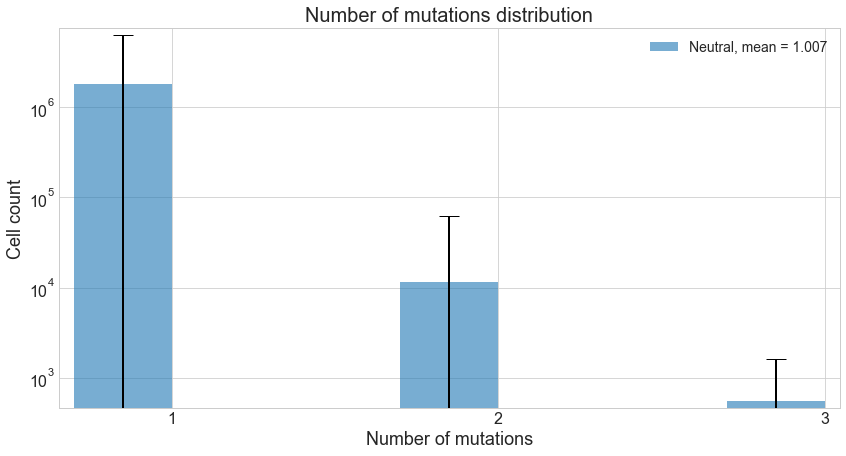

In [26]:
neutral_errors = neutral_std_nmd.values

plt.bar(left=neutral_avg_nmd.index-0.15, height=neutral_avg_nmd.values, width=0.3, alpha=0.6, align='center', 
        yerr=neutral_errors, capsize=10,
        label="Neutral, mean = %s" %(round(neutral_avg_num_mut, 3)));

plt.title("Number of mutations distribution");
plt.xlabel('Number of mutations');
plt.ylabel('Cell count');
plt.yscale('log');
plt.xticks(list(neutral_std_nmd.index));
plt.margins(0.02);
plt.legend();
plt.savefig('./Figures/MultiSim-Large-1000_sim/Large-neutral-Num_mutations.png')
plt.show()

## Total number of mutations

In [13]:
%%time
neutral_total_m = get_total_mutations(neutral, det_lim=1)

CPU times: user 12.1 s, sys: 36.5 s, total: 48.6 s
Wall time: 1min 19s


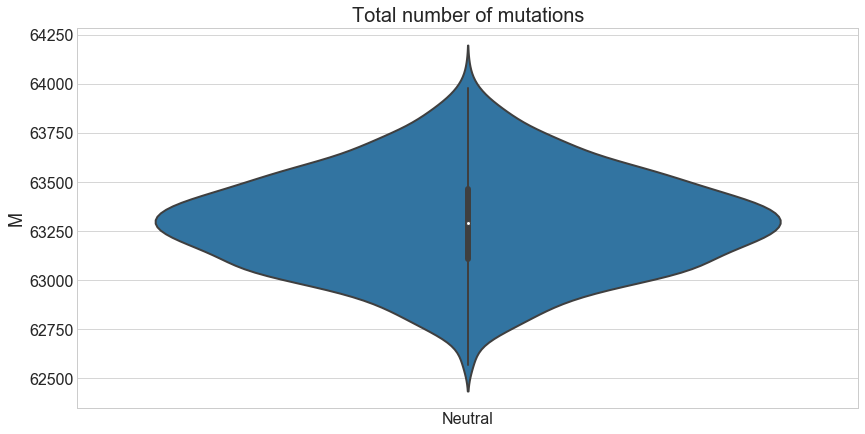

In [14]:
sns.violinplot(data=[neutral_total_m]);
plt.title("Total number of mutations");
plt.ylabel("M");
plt.xticks([0], ["Neutral"]);
plt.savefig('./Figures/MultiSim-Large-1000_sim/Large-neutral-Total_num_mutations.png')
plt.show()

## Errors in reconstruction of mutational timeline

Make sure that the vaue for **alpha** is correct!

In [15]:
alpha = 0.3

In [16]:
%%time
neutral_rec_errors = get_reconstruction_errors(neutral, alpha, det_lim=100)

CPU times: user 1min 58s, sys: 5.32 s, total: 2min 3s
Wall time: 2min 9s


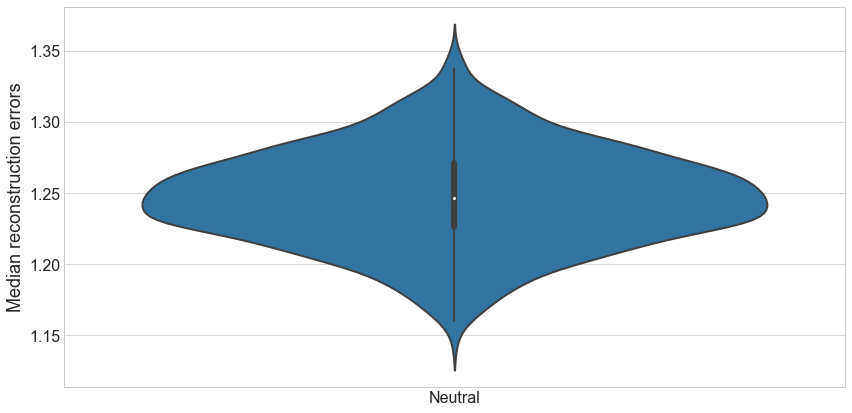

In [17]:
sns.violinplot(data=[neutral_rec_errors]);
plt.ylabel("Median reconstruction errors");
plt.xticks([0], ["Neutral"]);
plt.savefig('./Figures/MultiSim-Large-1000_sim/Large-neutral-Rec_errors.png')
plt.show()

## Export data

In [18]:
d = pd.DataFrame()
d["neutral_MaxAFs"] = neutral_MaxAFs
d["neutral_H"] = neutral_H
d["neutral_total_m"] = neutral_total_m
d["neutral_rec_errors"] = neutral_rec_errors

d.to_csv('../Analysis-Data/Large-neutral-1000_sim-Analyzed_data.csv')